# check variance along l b v

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

/Users/larryli/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data_file_path = '../data_out/all_prop.txt'

In [3]:
# all the data fields
keys = ['ra',
        'dec',
        'l',
        'b',
        'size',
        'roundness',
        'starting_velocity',
        'velocity_span',
        'average_velocity',
        'moment_0_mean',
        'moment_0_median',
        'moment_0_peak',
        'moment_1_mean',
        'moment_1_median',
        'moment_2_mean',
        'moment_2_median',
        'moment_2_peak',
        'column_density_mean',
        'column_density_median',
        'column_density_peak',
        'width_fit',
        'width_err']

In [4]:
data = np.loadtxt(data_file_path, delimiter=',')

In [5]:
data.shape # 533 trees (excluding edge cases and ones that are too long in velocity), 22 fields outlined in keys

(533, 22)

In [6]:
ras = data[:, 0]
decs = data[:, 1]
ls = data[:, 2]
bs = data[:, 3]
sizes = data[:, 4]
roundnesses = data[:, 5]
starting_velocities = data[:, 6]
velocity_spans = data[:, 7]
average_velocities = data[:, 8]
moment_0_means = data[:, 9]
moment_0_medians = data[:, 10]
moment_0_peaks = data[:, 11]
moment_1_means = data[:, 12]
moment_1_medians = data[:, 13]
moment_2_means = data[:, 14]
moment_2_medians = data[:, 15]
moment_2_peaks = data[:, 16]
column_density_means = data[:, 17]
column_density_medians = data[:, 18]
column_density_peaks = data[:, 19]
width_fits = data[:, 20]
width_errs = data[:, 21]

In [19]:
# b variance
b_bins = np.arange(0, 90.1, 10)
b_var = []
for i in range(len(b_bins) - 1):
    b_var.append(np.nanstd(width_fits[(np.abs(bs) > b_bins[i]) & (np.abs(bs) < b_bins[i + 1])]) ** 2)
b_var = np.array(b_var)
b_bin_plot = b_bins[:-1]+5

In [90]:
# b variance
b_bin_plot = np.arange(0, 90, 1)
b_var = []
for b in b_bin_plot:
    b_var.append(np.nanstd(width_fits[(np.abs(bs) > b - 5) & (np.abs(bs) < b + 5)] ** 2))
b_var = np.array(b_var)

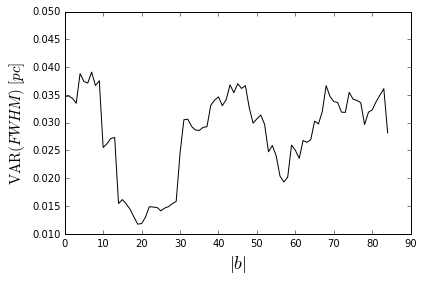

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(b_bin_plot, b_var, '-', color='black')
ax.set_xlim(0, 90)
ax.set_xlabel(r'$|b|$', fontsize=18)
ax.set_ylabel(r'$\mathrm{VAR}(FWHM)\ [pc]$', fontsize=15)
fig.tight_layout()
fig.show()

In [92]:
# b variance non abs
b_bin_plot = np.arange(-60, 85, 1)
b_var = []
for b in b_bin_plot:
    b_var.append(np.nanstd(width_fits[(bs > b - 5) & (bs < b + 5)] ** 2))
b_var = np.array(b_var)

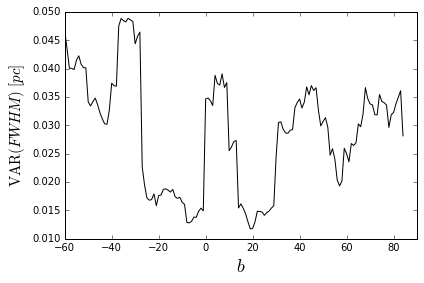

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(b_bin_plot, b_var, '-', color='black')
ax.set_xlim(-60,90)
ax.set_xlabel(r'$b$', fontsize=18)
ax.set_ylabel(r'$\mathrm{VAR}(FWHM)\ [pc]$', fontsize=15)
fig.tight_layout()
fig.show()

In [65]:
# l variance
l_bins = np.arange(0, 360.1, 20)
l_var = []
for i in range(len(l_bins) - 1):
    l_var.append(np.nanstd(width_fits[(ls > l_bins[i]) & (ls < l_bins[i + 1])]) ** 2)
l_var = np.array(l_var)
l_bin_plot = l_bins[:-1]+10

In [96]:
# l variance
l_bin_plot = np.arange(0, 360, 1)
l_var = []
for l in l_bin_plot:
    l_var.append(np.nanstd(width_fits[(ls > l - 10) & (ls < l + 10)] ** 2))
l_var = np.array(l_var)

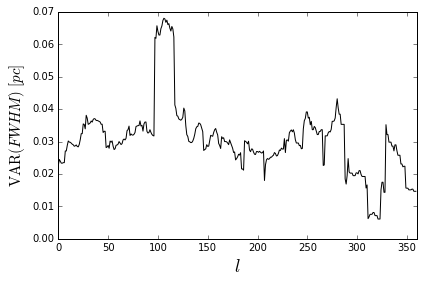

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(l_bin_plot, l_var, '-', color='black')
ax.set_xlim(0, 360)
ax.set_xlabel(r'$l$', fontsize=18)
ax.set_ylabel(r'$\mathrm{VAR}(FWHM)\ [pc]$', fontsize=15)
fig.tight_layout()
fig.show()

In [69]:
# v variance
v_bins = np.arange(0, 45.1, 10)
v_var = []
for i in range(len(v_bins) - 1):
    v_var.append(np.nanstd(width_fits[(np.abs(moment_1_medians) > v_bins[i]) & (np.abs(moment_1_medians) < v_bins[i + 1])]) ** 2)
v_var = np.array(v_var)
v_bin_plot = v_bins[:-1]+5

In [110]:
# v variance
v_bin_plot = np.arange(0, 45, 1)
v_var = []
for v in v_bin_plot:
    v_var.append(np.nanstd(width_fits[(np.abs(moment_1_medians) > v - 5) & (np.abs(moment_1_medians) < v + 5)] ** 2))
v_var = np.array(v_var)

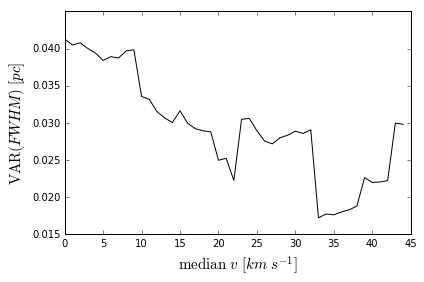

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(v_bin_plot, v_var, '-', color='black')
ax.set_xlabel(r'$\mathrm{median\ } v\ [km\ s^{-1}]$', fontsize=15)
ax.set_ylabel(r'$\mathrm{VAR}(FWHM)\ [pc]$', fontsize=15)
fig.tight_layout()
fig.show()

In [113]:
# v variance
v_bin_plot = np.arange(-50, 45, 1)
v_var = []
for v in v_bin_plot:
    v_var.append(np.nanstd(width_fits[(moment_1_medians > v - 5) & (moment_1_medians < v + 5)] ** 2))
v_var = np.array(v_var)

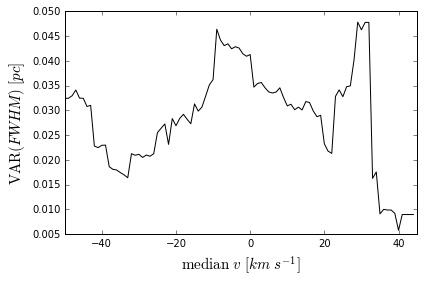

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(v_bin_plot, v_var, '-', color='black')
ax.set_xlim(-50, 45)
ax.set_xlabel(r'$\mathrm{median\ } v\ [km\ s^{-1}]$', fontsize=15)
ax.set_ylabel(r'$\mathrm{VAR}(FWHM)\ [pc]$', fontsize=15)
fig.tight_layout()
fig.show()